Вариационная модель звезды

Как параметр задана масса звезды M.
Звезда разбита на N сферических слоев.
Также задано распределение водорода по слоям.
Имеется N+1 точка - расстояния от центра до i-го слоя.
Неизвестными являются массивы расстояний r[i] и температур t[i]

Date of creation: 2.07.2020

Last updated: 3.07.2020

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import physics as ph

Physics version 1.2


In [3]:
from Sun import SSM18 as s

SSM18 version 1.4


In [4]:
pi = math.pi
K = 60 # number of interpolated layers
dimM = 17*K+1 # N+1 - число точек модели (сферических слоев + 1)
Z = s.Z

In [5]:
df1 = s.load_interpolated_data(K)
df1

,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Pressure
0,0.000000e+00,0.000000,1.550000e+07,1.563000e+02,0.000000e+00,0.355000,1.100000,2.381543e+17
1,4.583333e-08,0.000767,1.549660e+07,1.560969e+02,3.657407e-07,0.355432,1.101138,2.379005e+17
2,3.666667e-07,0.001533,1.549292e+07,1.558880e+02,2.925926e-06,0.355883,1.102293,2.376386e+17
3,1.237500e-06,0.002300,1.548896e+07,1.556733e+02,9.875000e-06,0.356356,1.103467,2.373684e+17
4,2.933333e-06,0.003067,1.548472e+07,1.554529e+02,2.340741e-05,0.356849,1.104658,2.370900e+17
...,...,...,...,...,...,...,...,...
1016,1.000000e+00,0.989933,5.527218e+04,4.293612e-04,1.000000e+00,0.732000,1.008698,3.257727e+09
1017,1.000000e+00,0.992450,4.272367e+04,2.831949e-04,1.000000e+00,0.732000,0.832355,1.660884e+09
1018,1.000000e+00,0.994967,3.029547e+04,1.629593e-04,1.000000e+00,0.732000,0.655457,6.777072e+08
1019,1.000000e+00,0.997483,1.798758e+04,6.865431e-05,1.000000e+00,0.732000,0.478005,1.695219e+08


In [6]:
x = df1['Hydrogen'].values
r = df1['Radius'].values*s.R
m = df1['Mass'].values*s.M
t = df1['Temperature'].values
# The rest may be computed from the above variables.
d = df1['Density'].values
l = df1['Luminosity'].values*s.L
p = df1['Pressure'].values
k = df1['Opacity'].values

In [7]:
d1 = np.zeros(dimM)
l1 = np.zeros(dimM)
p1 = np.zeros(dimM)
k1 = np.zeros(dimM)

In [8]:
x.shape

(1021,)

In [20]:

d[0] = 3*m[1]/4/pi/pow(r[1], 3)
d[1] = 0.5*d[0] + 0.5*(m[2] - m[1])/4/pi/pow((r[1] + r[2])/2, 2)/(r[2] - r[1])
for i in range(2, dimM-1):
    d[i] = ((m[i+1] - m[i])/pow(r[i], 2)/(r[i+1] - r[i]) + (m[i] - m[i-1])/pow(r[i], 2)/(r[i] - r[i-1]))/8/pi
d[dimM-1] = 0.
for i in range(dimM):
    p[i] = ph.Pressure(d[i], t[i], x[i], 1 - Z - x[i], Z)
    k[i] = ph.opacity(d[i], t[i], x[i], 1 - Z - x[i], Z)
l[0] = 0.
for i in range(1, dimM):
    l[i] = l[i-1] + (m[i] - m[i-1])*ph.Etot(d[i], t[i], x[i], 1 - Z - x[i], Z) # /0.5879669006862714

In [ ]:
for i in range(dimM):
    print(i, l1[i], l[i])

In [21]:
for i in range(dimM):
    print(d1[i], d[i])

156.3 143.31724392258448
133.9 131.82731891579235
108.1 110.5196328708319
78.9 75.27591039108262
63.2 61.593351300072484
53.6 52.9814886114439
45.7 46.15772233028045
38.5 39.174516872533815
29.4 29.026649658852026
22.1 21.611853934197924
16.1 15.40830508890182
8.03 7.872433275180026
2.85 2.8791093599090924
0.773 0.8921474141681306
0.338 0.3571566041760261
0.169 0.16679284458681545
0.05 0.05220671087255304
2.8e-07 0.0


In [22]:
for i in range(dimM):
    print(l1[i]/s.L, l[i]/s.L)

0.0 0.0
0.079 0.08554061741725977
0.264 0.2818852882521794
0.555 0.5533160768288975
0.7179999999999999 0.7144652784106362
0.809 0.8111775890999076
0.874 0.8798626582908967
0.9209999999999999 0.9296027496870293
0.964 0.9685130825372467
0.986 0.9879229457626771
0.996 0.9969327305056751
1.0 0.9997732660968942
1.0 0.9999923602517709
1.0 0.9999997100568466
1.0 0.9999999835352114
1.0 0.9999999999990291
1.0 1.0
1.0 1.0


In [23]:
for i in range(dimM):
    print(k1[i], k[i])

1.1 1.0086306353163017
1.2 1.181424814181715
1.3 1.3290982629286399
1.4 1.335694225878389
1.6 1.5593253496028225
1.7 1.6803830337646455
1.8 1.818028449080095
1.9 1.9332878475908009
2.1 2.073332117660098
2.4 2.3469886610704633
2.8 2.6797052254833007
3.5 3.4313220971927123
4.7 4.748004917910583
8.0 9.23309097375497
12.2 12.891451408974664
16.8 16.580590463854012
10.0 2.3256087566360413
0.3 0.0


In [7]:
e = np.zeros(dimM) # энерговыделения
a = np.zeros(dimM) # градиент давления
da = np.zeros(dimM) # несоответствие градиента давления
b = np.zeros(dimM) # градиент температуры
db = np.zeros(dimM) # несоответствие градиента температуры 

Условие гидростатики

In [8]:
for i in range(1, dimM-1):
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    a[i] = -ph.G*m[i]*d[i]/pow(r[i], 2)
    da[i] = (p[i+1] - p[i])/2/(r[i+1] - r[i]) + (p[i] - p[i-1])/2/(r[i] - r[i-1]) - a[i]

In [11]:
da[10:dimM-1]/a[10:dimM-1]

array([-0.70247055, -0.72187298, -0.73796734, ..., -0.06517688,
       -0.05616589,  0.0228627 ])

Условие переноса энергии

In [12]:
for i in range(1, dimM-1):
    rad = -3/16*k[i]*d[i]*l[i]/ph.sigma/pow(t[i], 3)/4/pi/pow(r[i], 2)
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    conv = -0.4*mu/ph.kB*ph.m_prot*ph.G*m[i]/pow(r[i], 2)
    if abs(rad) > abs(conv):
        b[i] = rad
    else:
        b[i] = conv
    db[i] = (t[i+1] - t[i])/2/(r[i+1] - r[i]) + (t[i] - t[i-1])/2/(r[i] - r[i-1]) - b[i]

In [13]:

db[1:dimM-1]/b[1:dimM-1]

array([-1.00566545, -1.01284182, -1.02176913, ..., -0.88876934,
       -0.91287992, -0.94092889])

In [14]:
sa = 0
sb = 0
for i in range(1, dimM-1):
    sa += pow(da[i]/a[i], 2)
    sb += pow(db[i]/b[i], 2)
sa, sb    

(40.84838523689571, 187.6740955020942)

In [15]:
dimM

1021

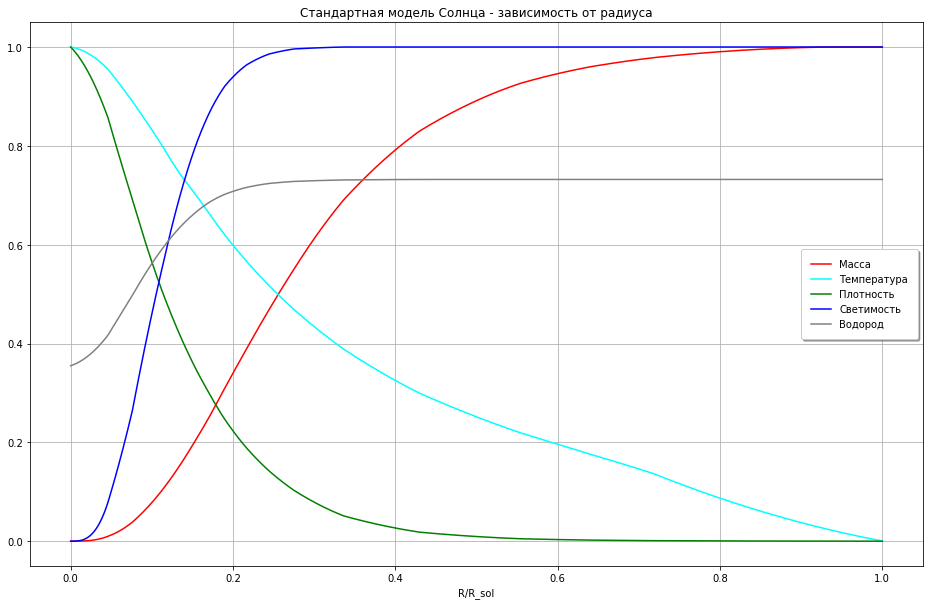

In [10]:
r1 = r/s.R
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
plt.plot(r1, d/d[0], color='green', label='Плотность')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Стандартная модель Солнца - зависимость от радиуса')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

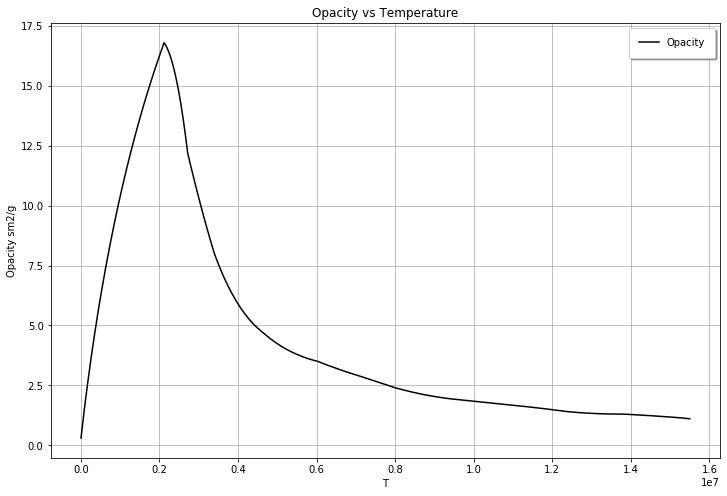

In [12]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.plot(t, k, color='black', label='Opacity')
# plt.plot(r1, myk, color='red', marker='.', label='Непроз my')
#plt.xlim(6, 7.25)
#plt.ylim(0, 20)
plt.xlabel('T')
plt.ylabel('Opacity sm2/g')
plt.title('Opacity vs Temperature')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);